# Аналіз якості роботи нейронної мережі для розпізнавання моделей одежі в Keras

Для того щоб запускати та редагувати код, збережіть копію цього ноутбука собі е (File->Save a copy in Drive...). Свою копію ви можете змінювати та запускати



In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Підготовка даних для навчаня мережі

**Завантажуємо набір даних**

In [ ]:
# В Keras вбудовані засоби роботи з популярним набором даних 
# (x_train, y_train) - набір даних для навчання
# (x_test, y_test) - набір даних для тестування 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

 Список з назвами класів 

In [ ]:
classes = ['футболка', 'брюки', 'светр', 'плаття', 'пальто', 'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

 Переглянемо приклади зображень

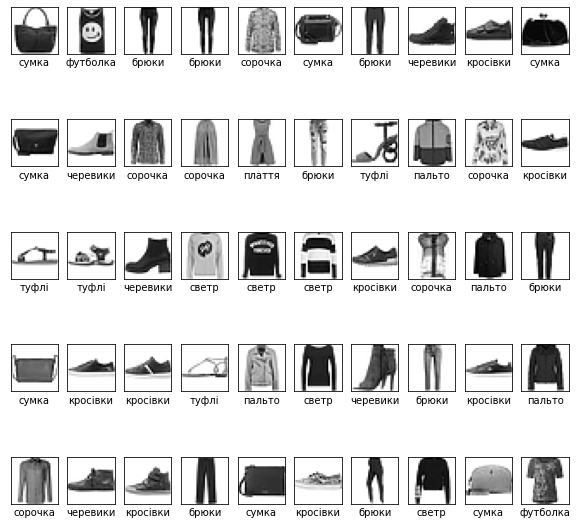

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Перетворення розмірності зображень в наборі**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормалізація даних**

In [ ]:
# Вектаризовані операції 
# Застосовуються до кожного елемент масиву окремо 
x_train = x_train / 255 
x_test = x_test / 255 

**Робота з правильними відповідями**

In [ ]:
n = 0

In [ ]:
print(y_train[n])

9


**Перетворюємо мітки у категорії в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)

In [ ]:
y_test = utils.to_categorical(y_test, 10)

**Правильна відповідь в форматі one hot encoding**

In [ ]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Створюємо нейрону мережу

**Створюємо послідовну модель**

In [ ]:
# Створюємо послідовну модель
model = Sequential()
# Вхідний повнов'язаний шар, 800 нейронів, 784 входи в кожен нейрон
model.add(Dense(1000, input_dim=784, activation="relu"))
model.add(Dense(300, activation="relu"))
# Вихідний повнозв'язаний шар, 10 нейронів (по кількості рукописних цифр)
model.add(Dense(10, activation="softmax"))

**Компілюємо мережу**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1000)              785000    
                                                                 
 dense_67 (Dense)            (None, 300)               300300    
                                                                 
 dense_68 (Dense)            (None, 10)                3010      
                                                                 
Total params: 1,088,310
Trainable params: 1,088,310
Non-trainable params: 0
_________________________________________________________________
None


## Навчаємо нейрону мережу


In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=100, 
                    epochs=120,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/120
480/480 [==============================] - 2s 3ms/step - loss: 0.9546 - accuracy: 0.7161 - val_loss: 0.6522 - val_accuracy: 0.7918
Epoch 2/120
480/480 [==============================] - 2s 3ms/step - loss: 0.5907 - accuracy: 0.8086 - val_loss: 0.5464 - val_accuracy: 0.8173
Epoch 3/120
480/480 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.8252 - val_loss: 0.5033 - val_accuracy: 0.8288
Epoch 4/120
480/480 [==============================] - 1s 3ms/step - loss: 0.4838 - accuracy: 0.8368 - val_loss: 0.4816 - val_accuracy: 0.8333
Epoch 5/120
480/480 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.8429 - val_loss: 0.4609 - val_accuracy: 0.8396
Epoch 6/120
480/480 [==============================] - 2s 3ms/step - loss: 0.4433 - accuracy: 0.8476 - val_loss: 0.4480 - val_accuracy: 0.8444
Epoch 7/120
480/480 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8511 - val_loss: 0.4372 - val_accuracy: 0.8465

## Зберігаємо нейронну мережу для послідовного використання 

In [ ]:
model.save('fashion_mnist_dense.h5')

## Оцінка якості навчання 

Перевірка якості роботи на наборі даних для тестування

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8905


In [ ]:
print("Доля правильних відповідей на тестових даних, в відсотках:", round(scores[1] * 100, 4))

Доля правильних відповідей на тестових даних, в відсотках: 89.05


## Використовуємо мережу для розпізнавання предметів одежі 

In [ ]:
n_rec = 492

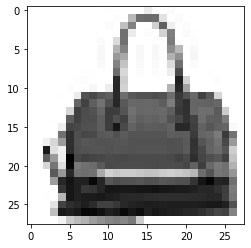

In [ ]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Змінюємо розмірність зображення та нормалізуємо його**

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [ ]:
prediction = model.predict(x)

**Друкуємо результати розпізнавання**

In [ ]:
prediction

array([[2.2115451e-05, 1.3468630e-08, 1.0512198e-07, 1.6884494e-06,
        7.5073435e-06, 2.7264230e-05, 2.7372087e-07, 5.8068025e-07,
        9.9994028e-01, 7.8464673e-08]], dtype=float32)

**Перетворюємо результати із формату one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print("Номер класу:", prediction)
print("Назва класу:", classes[prediction])


Номер класу: 8
Назва класу: сумка


**Друкуємо правильну відповідь**

In [ ]:
label = np.argmax(y_test[n_rec])
print("Номер класу:", label)
print("Назва класу:", classes[label])

Номер класу: 8
Назва класу: сумка


## Завантажуємо свою картинку
Натиснути кнопку "Вибрати файли" та завантажити зображення з диску

In [ ]:
files.upload()

Перевіряємо завантаження картинки

In [ ]:
!ls

 fashion_mnist_dense.h5   images.jfif   sample_data  'роман шухевич.jfif'


Завантажуємо картинку з файлу

In [ ]:
img_path = 'images.jfif'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показуємо картинку

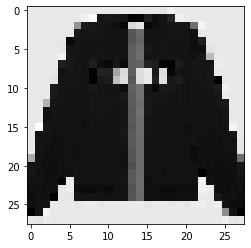

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Перетворюємо картинку для обробки нейронів нейронно мережою

In [ ]:
# Перетворюємо зображення в масив
x = image.img_to_array(img)
# Змінюємо форму масиву в плаский вектор
x = x.reshape(1, 784)
# Інвертуємо зображення
x = 255 - x
# Нормалізуємо зображення
x = x/255

Запускаємо розпізнавання

In [ ]:
prediction = model.predict(x)

Результати розпізнавання

In [ ]:
prediction

array([[9.6031353e-03, 1.4497196e-02, 7.5465816e-01, 2.9411705e-03,
        7.6451458e-02, 1.9683797e-17, 1.0157670e-02, 3.3369425e-08,
        1.3169061e-01, 5.3439976e-07]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
print("Номер класу:", prediction)
print("Назва класу:", classes[prediction])

Номер класу: 2
Назва класу: светр


## Ідеї по зміні архітектури нейронної мережі

1. Спробуйте використати різну кількість нейронів на вхідному шарі: 400, 600, 800, 1200.
2. Додайте в нейронну мережу прихований шар з різною кількістю нейронів: 200, 300, 400, 600, 800.
3. Додайте декілька прихованих шарів в мережу з різною кількістю нейронів в кожому шарі.
3. Використайте різну кількість епох: 10, 15, 20, 25, 30.
4. Використайте різні розміри міні-вибірки (batch_size): 10, 50, 100, 200, 500.
 

Підберіть різні комбінації гіперпараметрів таким чином, щоб отримати кращий результат на тестовому наборі даних.

Переконайтесь, що в вашій моделі немає перенавчання.